<a href="https://colab.research.google.com/github/componavt/differential_equations/blob/main/src/equation_dx_dt_is_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Суммарная абсолютная ошибка: 213.6402
MSE: 5.2252


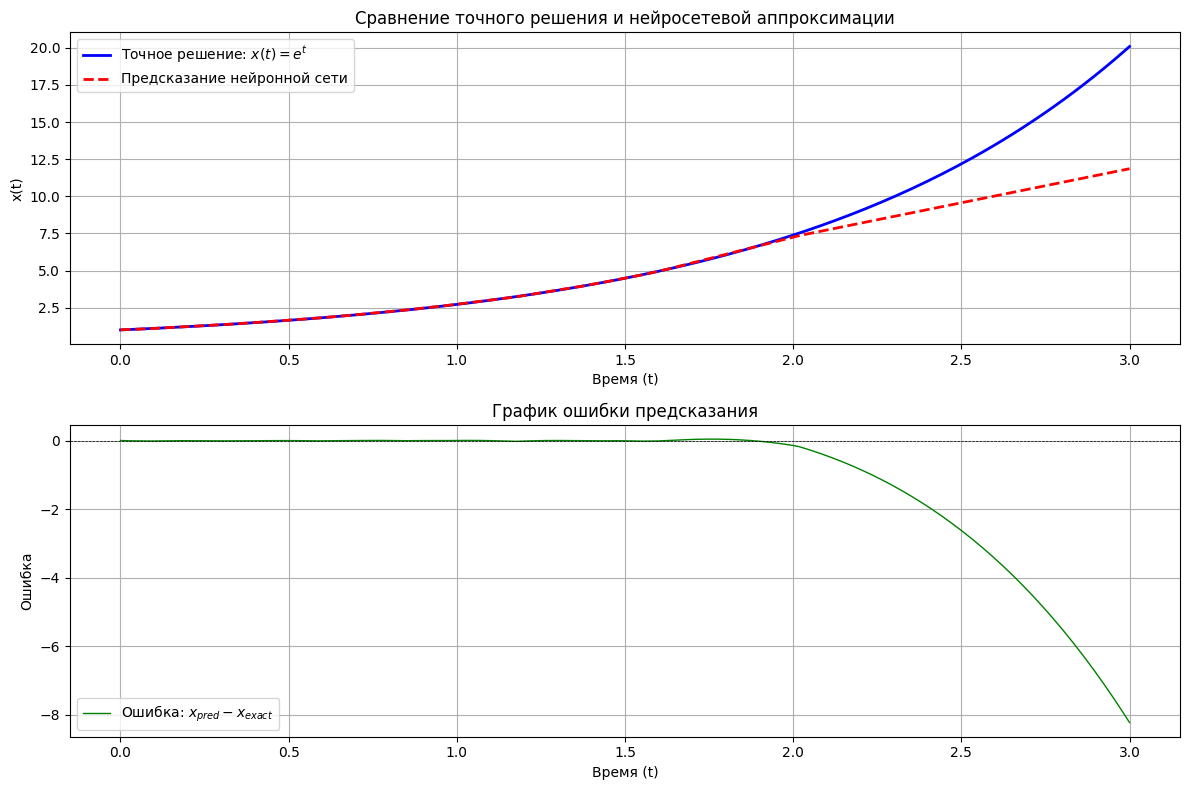

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Точное решение dx/dt = x (x(0) = 1)
def exact_solution(t):
    return np.exp(t)

# Генерация данных
t_train = np.linspace(0, 2, 100).reshape(-1, 1)  # Обучаем на t ∈ [0, 2]
x_train = exact_solution(t_train)

# Создаём модель
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(t_train, x_train, epochs=500, verbose=0)

# Предсказание на более широком интервале (t ∈ [0, 3])
t_test = np.linspace(0, 3, 200).reshape(-1, 1)
x_exact = exact_solution(t_test).flatten()
x_pred = model.predict(t_test).flatten()

# Вычисление ошибок
error = x_pred - x_exact  # Ошибка в каждой точке
total_error = np.sum(np.abs(error))  # Суммарная абсолютная ошибка
mse = np.mean(error**2)  # Среднеквадратичная ошибка

print(f"Суммарная абсолютная ошибка: {total_error:.4f}")
print(f"MSE: {mse:.4f}")

# Визуализация
plt.figure(figsize=(12, 8))

# График решений
plt.subplot(2, 1, 1)  # Первый subplot
plt.plot(t_test, x_exact, 'b-', label='Точное решение: $x(t) = e^t$', linewidth=2)
plt.plot(t_test, x_pred, 'r--', label='Предсказание нейронной сети', linewidth=2)
plt.xlabel('Время (t)')
plt.ylabel('x(t)')
plt.title('Сравнение точного решения и нейросетевой аппроксимации')
plt.legend()
plt.grid(True)

# График ошибки
plt.subplot(2, 1, 2)  # Второй subplot
plt.plot(t_test, error, 'g-', label='Ошибка: $x_{pred} - x_{exact}$', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Нулевая линия
plt.xlabel('Время (t)')
plt.ylabel('Ошибка')
plt.title('График ошибки предсказания')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Чтобы графики не накладывались
plt.show()